In [48]:
import pandas as pd

In [59]:
data = pd.read_csv('/content/customer_tier_classification.csv')

In [50]:
# Shape of the data
data.shape

(1218, 12)

In [51]:
# Null values
data.isna().sum()

,0
id,0
age,0
income_k,90
credit_score,74
clicks_7d,0
is_premium,0
email_verified,7
city,48
segment,25
tenure_bucket,31


In [52]:
# Duplicate records
print(data.duplicated().sum())

18


In [8]:
# Removing duplicates from data
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [12]:
# Identify the type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1200 non-null   int64  
 1   age             1200 non-null   int64  
 2   income_k        1112 non-null   float64
 3   credit_score    1128 non-null   float64
 4   clicks_7d       1200 non-null   int64  
 5   is_premium      1200 non-null   bool   
 6   email_verified  1193 non-null   object 
 7   city            1153 non-null   object 
 8   segment         1177 non-null   object 
 9   tenure_bucket   1169 non-null   object 
 10  device          1200 non-null   object 
 11  tier            1200 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 113.7+ KB


In [9]:
# Checking the dataset is balanced or not
data['tier'].value_counts()

,count
tier,
Gold,408
Silver,396
Bronze,396


In [10]:
# Numeric ranges of features
data.describe()

,id,age,income_k,credit_score,clicks_7d
count,1200.000000,1200.000000,1112.000000,1128.000000,1200.000000
mean,600.500000,32.037500,46.751709,65.917730,3.955000
std,346.554469,8.383993,52.134393,14.768956,2.801103
min,1.000000,18.000000,6.730000,22.100000,0.000000
25%,300.750000,26.000000,24.790000,55.575000,2.000000
50%,600.500000,32.000000,36.545000,65.700000,3.000000
75%,900.250000,38.000000,52.102500,76.325000,6.000000
max,1200.000000,61.000000,939.310000,100.000000,14.000000


In [ ]:
# Distribution of the features

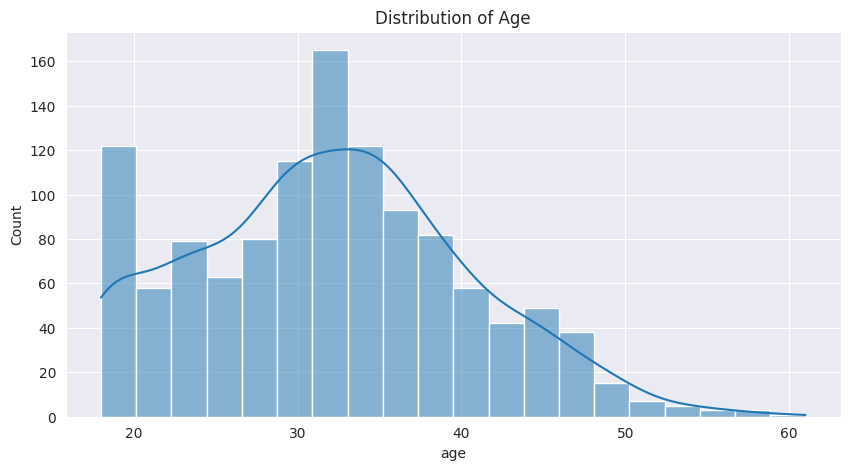

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Plot the ranges of age
plt.figure(figsize=(10,5))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

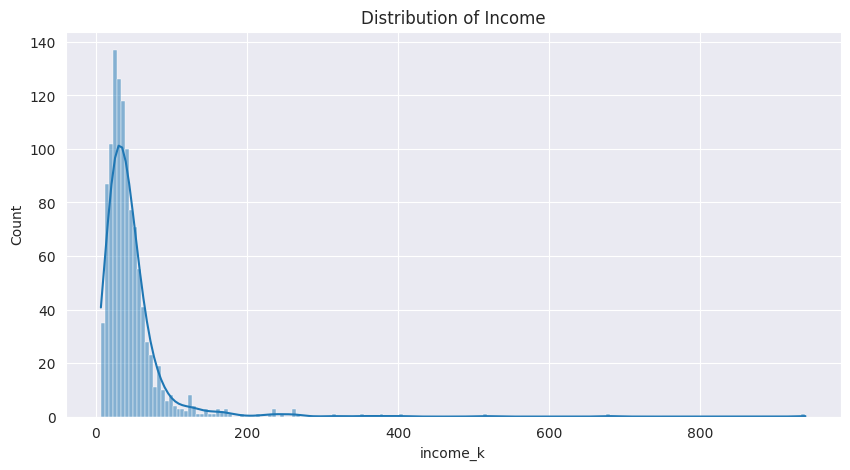

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Plot the ranges of credit_score
plt.figure(figsize=(10,5))
sns.histplot(data['income_k'], kde=True)
plt.title('Distribution of Income')
plt.show()

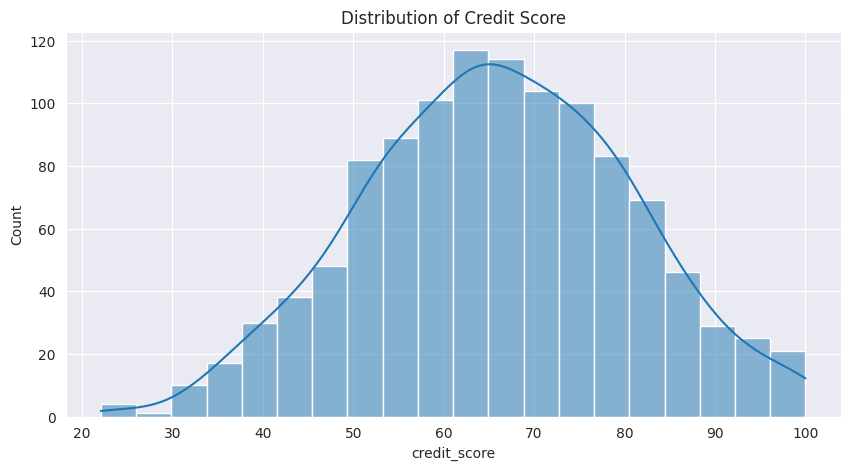

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Plot the ranges of credit_score
plt.figure(figsize=(10,5))
sns.histplot(data['credit_score'], kde=True)
plt.title('Distribution of Credit Score')
plt.show()

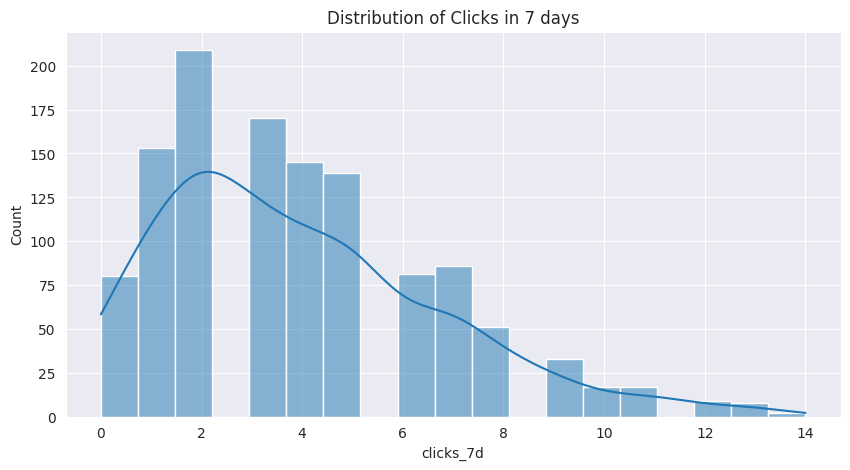

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Plot the ranges of clicks_7d
plt.figure(figsize=(10,5))
sns.histplot(data['clicks_7d'], kde=True)
plt.title('Distribution of Clicks in 7 days')
plt.show()

In [18]:
#  Find the count of each Age
data['age'].value_counts()


,count
age,
18,80
36,63
29,62
35,62
31,60
34,60
30,53
32,53
33,52


In [24]:
# Incomes that corresponds to tier
pd.crosstab(data['tier'], data['income_k'])

income_k,6.73,6.79,7.15,7.50,7.88,7.95,8.00,8.45,8.68,9.28,...,260.63,263.43,267.29,314.22,352.29,377.17,404.75,513.93,680.94,939.31
tier,,,,,,,,,,,,,,,,,,,,,
Bronze,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Gold,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Silver,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#preprocess  the feature 'segment'
data['segment'].head()

,segment
0,B
1,A
2,A
3,D
4,A


In [61]:
data['segment'].isna().sum()

np.int64(25)

In [62]:
data['segment'].fillna('unknown', inplace=True)
data['segment'].isna().sum()

/tmp/ipython-input-2027967887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['segment'].fillna('unknown', inplace=True)


np.int64(0)

In [58]:
# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data = data.select_dtypes(include=['object'])
for col in cat_data.columns:
    data[col] = le.fit_transform(data[col])

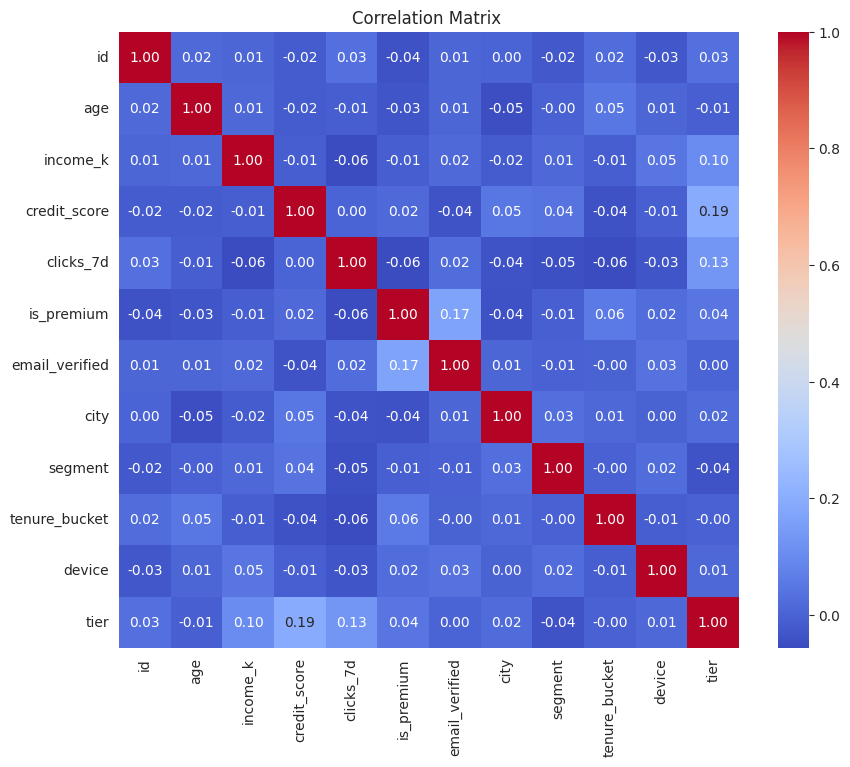

In [45]:
# CORRELATION MATRIX

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ')
plt.show()

In [63]:
data.head()

,id,age,income_k,credit_score,clicks_7d,is_premium,email_verified,city,segment,tenure_bucket,device,tier
0,306,23,47.78,62.5,4,False,True,NaN,B,NaN,Android,Silver
1,622,32,55.44,79.5,6,True,True,Kochi,A,NaN,Web,Gold
2,704,31,33.81,75.3,4,False,True,Bengaluru,A,3-5y,Android,Gold
3,458,24,13.80,78.5,8,False,True,Delhi,D,1-3y,Android,Bronze
4,171,26,15.79,75.0,4,False,True,NaN,A,5+y,iOS,Bronze


In [71]:
# define the features as categorical, numerical, nominal and ordinal
nominal_cols = ['segment']
ordinal_cols = ['tenure_bucket']
boolean_cols = ['is_premium', 'email_verified']
numerical_cols = ['id', 'age', 'income_k', 'credit_score', 'clicks_7d']

print(cat_data)

     email_verified       city segment tenure_bucket   device    tier
0              True        NaN       B           NaN  Android  Silver
1              True      Kochi       A           NaN      Web    Gold
2              True  Bengaluru       A          3-5y  Android    Gold
3              True      Delhi       D          1-3y  Android  Bronze
4              True        NaN       A           5+y      iOS  Bronze
...             ...        ...     ...           ...      ...     ...
1213          False      Kochi       C           5+y  Android    Gold
1214           True     Bhopal       D           New  Android    Gold
1215           True      Vizag       D          1-3y  Android    Gold
1216           True    Madurai       B          1-3y      iOS  Silver
1217          False      Kochi       C           New  Android  Bronze

[1218 rows x 6 columns]


In [73]:
# X and Y
X = data.drop('tier', axis = 1)
Y = data['tier']

In [74]:
# Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=True, with_std=True))
])

nom_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

bool_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
    #optional
])

# Define the order for the ordinal feature 'tenure_bucket'
tenure_order = ['New', '1-3y', '3-5y', '5+y'] # Assuming this order based on common sense for tenure buckets

ord_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[tenure_order]))
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, numerical_cols),
    ('nom', nom_pipe, nominal_cols),
    ('bool', bool_pipe, boolean_cols),
    ('ord', ord_pipe, ordinal_cols)
], remainder = 'drop')

In [77]:
# Train, Test, Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)


In [81]:
# connect the model with pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline # Import Pipeline if not already imported

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(n_estimators=4, verbose=True))
])

In [82]:
# fit model
model.fit(X_train, Y_train)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'age', 'income_k',
                                                   'credit_score',
                                                   'clicks_7d']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['segment']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['is_premium',
                                                   'email_verified']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['New',
                                                                                               '1-3y',
                                                                                               '3-5y',
                                                                                               '5+y']]))]),
                                                  ['tenure_bucket'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=4, verbose=True))])

In [83]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


In [84]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
model.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


0.6434426229508197

In [86]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      Bronze       0.68      0.80      0.74        81
        Gold       0.66      0.76      0.71        75
      Silver       0.56      0.40      0.46        88

    accuracy                           0.64       244
   macro avg       0.63      0.65      0.64       244
weighted avg       0.63      0.64      0.63       244

